In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [26]:
data = pd.read_csv(r"C:\Users\msy14\Desktop\sklearn_class\01DTtree\data.csv",index_col = 0)

In [27]:
data.head(10)#默认显示5行数据

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [28]:
data.info() # 发现Age的数据有确实

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


In [29]:
#特征筛选
data.drop(['Cabin',"Name","Ticket"],inplace=True,axis=1)#去掉没有用的特征,axis=1表示对列操作

In [30]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,NaN,0,0,8.4583,Q
7,0,1,male,54.0,0,0,51.8625,S
8,0,3,male,2.0,3,1,21.0750,S
9,1,3,female,27.0,0,2,11.1333,S


In [31]:
#处理缺失值
data["Age"]=data["Age"].fillna(data["Age"].mean()) #处理Age缺失

In [32]:
data.info() #还有Embarked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [33]:
data=data.dropna() #去掉缺失部分特征值的例子

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [35]:
label = data["Embarked"].unique().tolist()

In [36]:
data["Embarked"] = data["Embarked"].apply(lambda x: label.index(x))#将变量换成数值

c:\users\msy14\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,0
2,1,1,female,38.000000,1,0,71.2833,1
3,1,3,female,26.000000,0,0,7.9250,0
4,1,1,female,35.000000,1,0,53.1000,0
5,0,3,male,35.000000,0,0,8.0500,0
6,0,3,male,29.699118,0,0,8.4583,2
7,0,1,male,54.000000,0,0,51.8625,0
8,0,3,male,2.000000,3,1,21.0750,0
9,1,3,female,27.000000,0,2,11.1333,0


In [38]:
data["Sex"] = (data["Sex"] == "male").astype("int")
#不建议data["Sex"]直接索引, 建议data.loc[:,"sex"]=

c:\users\msy14\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [42]:
#在整个数据中取出特征x与结果y
x = data.iloc[:,data.columns != "Survived"]

In [44]:
y= data.iloc[:,data.columns == "Survived"]

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)

In [50]:
#纠正索引 使分开的数据序号恢复到0到n
for i in [xtrain, xtest, ytrain, ytest] :
    i.index = range(i.shape[0])

In [52]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(xtrain,ytrain)
score = clf.score(xtest,ytest) #返回R^2

In [53]:
score

0.7640449438202247

In [55]:
#使用交叉验证查看
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,x,y,cv=10).mean()

In [56]:
score

0.7739274770173645

In [61]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion="entropy"
                                )
    clf = clf.fit(xtrain,ytrain)
    score_tr = clf.score(xtrain,ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
#这里为什么使用“entropy”？因为我们注意到，在最大深度=3的时候，模型拟合不足，
#在训练集和测试集上的表现接近，但却都不是非常理想，只能够达到83%左右，所以要使用entropy

0.8177860061287026


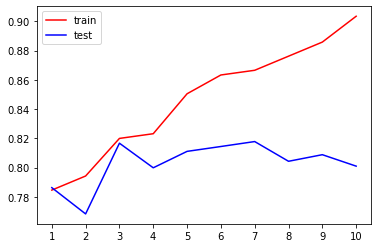

In [63]:
print(max(te)) 
plt.plot(range(1,11),tr,color="red",label="train") 
plt.plot(range(1,11),te,color="blue",label="test") 
plt.xticks(range(1,11)) 
plt.legend() 
plt.show()

In [65]:
#使用网格搜索:同时调整多个参数不同取值,枚举的方法
parameter = {"criterion":("gini","entropy")
             ,"splitter":("best","random")
             ,"max_depth":[*range(1,50,5)]
             ,"min_impurity_decrease":[*np.linspace(0,0.5,20)]
            }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,parameter,cv=10)
GS.fit(xtrain,ytrain)

c:\users\msy14\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=25,
                                              splitter='best'),
             iid='warn', n_...
                                                   0.18421052631578946,
                                                   0.21052631578947367,


In [66]:
GS.best_params_ #最佳参数组合

{'criterion': 'entropy',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'splitter': 'best'}

In [67]:
GS.best_score_ #最佳评判标准

0.819935691318328